# Titanic

#### To do list:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model

### 1) importing required libraries->

In [1]:
#data analysis libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 2) Read in and explore data->

In [2]:
train_df = pd.read_csv("C:/Users/user/Desktop/kaggle competetion/titanic comp/train.csv")
test_df = pd.read_csv("C:/Users/user/Desktop/kaggle competetion/titanic comp/test.csv")

In [3]:
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Norman, Mr. Robert Douglas",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#train_df.info()
#train_df.head(10)
#train_df.tail(10)

### 3) Data Analysis->

In [5]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### By looking at the sample dataset we come to know that:
 - NumericalFeatures: Age(continous), Fare(continous), SibSp(discrete), Parch(discrete)
 - CatagoricalFeatures: Survived, Pclass, Sex, Embarked
 - AlphanumericFeatures: Ticket, Cabin
    
Lets see how much info we about each of the features ->

In [7]:
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Norman, Mr. Robert Douglas",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### we can see that Age, Cabin and Embarked features has NaN values

    Age has 20% NaN values approximately
    Cabin has 77% NaN values approximately,since so much of missing values we'll probably drop theese values from dataset
    Embarked has 0.22% of NaN values

#### Some Predictions:
    Sex: Females are more likely to survive.
    SibSp/Parch: People traveling alone are more likely to survive.
    Age: Young children are more likely to survive.
    Pclass: People of higher socioeconomic class are more likely to survive

### 4) Data Visualization ->

percentage of females who survived:  74.20382165605095
percentage of males who survived:  18.890814558058924


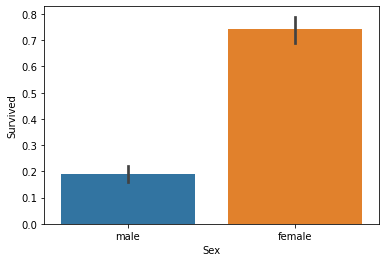

In [9]:
sns.barplot(x = "Sex", y = "Survived", data = train_df)

print("percentage of females who survived: ",train_df["Survived"][train_df["Sex"]=="female"].value_counts(normalize=True)[1]*100)
#((train_df["Survived"][train_df["Sex"] == "female"]).sum())/((train_df["Survived"][train_df["Sex"] == "female"]).count())*100
#train_df[["Sex","Survived"]].groupby("Sex",as_index=False).mean().sort_values(by="Survived",ascending=False)*100
print("percentage of males who survived: ",train_df["Survived"][train_df["Sex"]=="male"].value_counts(normalize = True)[1]*100)

percentage of Pclass 1:  62.96296296296296
percentage of Pclass 1:  47.28260869565217
percentage of Pclass 1:  24.236252545824847


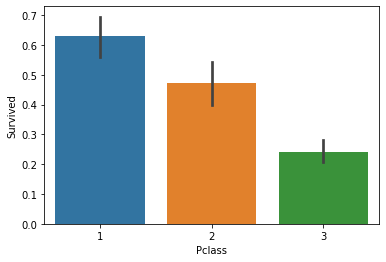

In [10]:




sns.barplot(x = "Pclass", y = "Survived", data = train_df)
print("percentage of Pclass 1: ",train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]*100)
print("percentage of Pclass 1: ",train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]*100)
print("percentage of Pclass 1: ",train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]*100)

AxesSubplot(0.125,0.125;0.775x0.755)


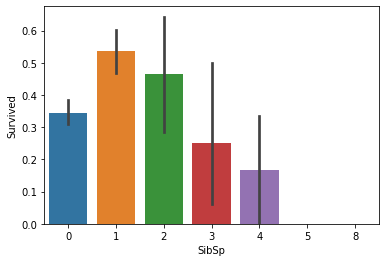

In [11]:
print(sns.barplot(x = "SibSp", y = "Survived", data = train_df))

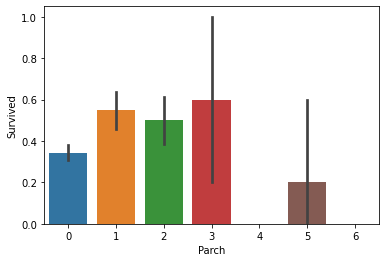

In [12]:
sns.barplot(x = "Parch", y = "Survived", data = train_df)

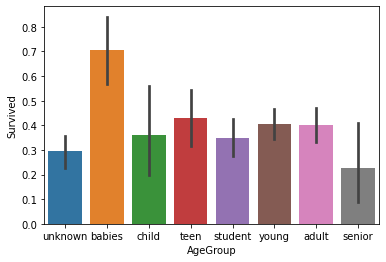

In [13]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]

labels = ["unknown","babies","child","teen","student","young","adult","senior"]

train_df["AgeGroup"] = pd.cut(train_df["Age"],bins,labels=labels)
test_df["AgeGroup"] = pd.cut(test_df["Age"],bins,labels=labels)

sns.barplot(x= "AgeGroup", y= "Survived", data = train_df)

#### Cabin Feature
the idea here is that people with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive.

percentage of cabin 1  66.66666666666666
percentage of cabin 0  29.985443959243085


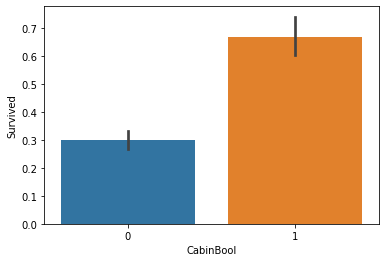

In [14]:
train_df["CabinBool"] = train_df["Cabin"].notnull().astype("int")
test_df["CabinBool"] = test_df["Cabin"].notnull().astype(int)

print("percentage of cabin 1 ",train_df["Survived"][train_df["CabinBool"]==1].value_counts(normalize=True)[1]*100)
print("percentage of cabin 0 ",train_df["Survived"][train_df["CabinBool"]==0].value_counts(normalize=True)[1]*100)

sns.barplot(x = "CabinBool", y = "Survived", data = train_df)

### 5) Data Cleaning

Time to clean our data to account for missing values and unnecessary information!

In [15]:
#lets look at test data 

test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
359,1251,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,young,0
167,1059,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,NaN,S,teen,0
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C,adult,1
342,1234,3,"Sage, Mr. John George",male,-0.5,1,9,CA. 2343,69.5500,NaN,S,unknown,0
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S,adult,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,student,0
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S,adult,0
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S,young,0
25,917,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.5000,NaN,S,adult,0
332,1224,3,"Thomas, Mr. Tannous",male,-0.5,0,0,2684,7.2250,NaN,C,unknown,0


In [16]:
#lets remove cabin and ticket feature since it does not provide most usefull information

train_df = train_df.drop(["Cabin"],axis=1)
test_df = test_df.drop(["Cabin"],axis=1)



train_df = train_df.drop(["Ticket"],axis=1)
test_df = test_df.drop(["Ticket"],axis=1)

In [17]:
#lets look at embarked feature majority of people emarked to southampton

train_df[["Survived","Embarked"]].groupby("Embarked",as_index=False).count().sort_values(by="Survived",ascending=False)


,Embarked,Survived
2,S,644
0,C,168
1,Q,77


In [18]:
#we can fill nan values with S (southampton)

train_df["Embarked"] = train_df["Embarked"].fillna("S")

 #### Age feature
 we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.
 

In [19]:
combine = [train_df,test_df]


for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+\.)',expand = False)
    
pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [20]:
#replce varios titles with common name
'''
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].str.replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
'''

"\nfor dataset in combine:\n    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',\n    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')\n    \n    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')\n    dataset['Title'] = dataset['Title'].str.replace('Mlle', 'Miss')\n    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')\n    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')\n"

##### note: the above code is commented because it should work but since it is not working we'll use another way


In [21]:
a = ['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona']
b = ['Countess', 'Lady', 'Sir']
for dataset in combine:
    for i in a:
        dataset['Title'] = dataset['Title'].str.replace(i,'Rare')
        
    for i in b:
        dataset['Title'] = dataset['Title'].str.replace(i, 'Royal')
    dataset['Title'] = dataset['Title'].str.replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].str.replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].str.replace('Mme', 'Mrs')
    
train_df[['Survived', 'Title']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master.,0.575000
1,Miss.,0.702703
2,Mr.,0.156673
3,Mrs.,0.793651
4,Rare.,0.285714
5,Royal.,1.000000


In [22]:
train_df["Title"].sample(10)

682     Mr.
797    Mrs.
284     Mr.
669    Mrs.
699     Mr.
247    Mrs.
581    Mrs.
186    Mrs.
488     Mr.
129     Mr.
Name: Title, dtype: object

In [23]:
title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Royal.": 5, "Rare.": 6}

for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    


In [24]:
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() #young
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() #student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() #adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() #baby
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() #adult
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode() #adult

#### Let's replace unknown values from AgeGroup column: 

In [25]:
'''age_title_mapping = {1: "Young", 2: "Student", 3: "Adult", 4: "Babies", 5: "Adult", 6: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]'''

'age_title_mapping = {1: "Young", 2: "Student", 3: "Adult", 4: "Babies", 5: "Adult", 6: "Adult"}\n\nfor x in range(len(train_df["AgeGroup"])):\n    if train_df["AgeGroup"][x] == "Unknown":\n        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]\n        \nfor x in range(len(test_df["AgeGroup"])):\n    if test_df["AgeGroup"][x] == "Unknown":\n        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]'

##### Note: the above code is commented because it has to work since its not working, Let's do it in another way

In [26]:
for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "unknown":
        if train_df["Title"][x]==1:
            train_df["AgeGroup"][x]= "young"
        elif train_df["Title"][x]==2:
            train_df["AgeGroup"][x]= "student"
        elif train_df["Title"][x]==3:
            train_df["AgeGroup"][x]= "adult"
        elif train_df["Title"][x]==4:
            train_df["AgeGroup"][x]= "babies"
        elif train_df["Title"][x]==5:
            train_df["AgeGroup"][x]= "adult"
        elif train_df["Title"][x]==6:
            train_df["AgeGroup"][x]= "adult"

for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "unknown":
        if test_df["Title"][x]==1:
            test_df["AgeGroup"][x]= "young"
        elif test_df["Title"][x]==2:
            test_df["AgeGroup"][x]= "student"
        elif test_df["Title"][x]==3:
            test_df["AgeGroup"][x]= "adult"
        elif test_df["Title"][x]==4:
            test_df["AgeGroup"][x]= "babies"
        elif test_df["Title"][x]==5:
            test_df["AgeGroup"][x]= "adult"
        elif test_df["Title"][x]==6:
            test_df["AgeGroup"][x]= "adult"

print(train_df["AgeGroup"][train_df["AgeGroup"]=="unknown"].count())
print(test_df["AgeGroup"][train_df["AgeGroup"]=="unknown"].count())


0
0


##### Now that we've filled in the missing values at least somewhat accurately (I will work on a better way for predicting missing age values), it's time to map each age group to a numerical value

In [27]:
age_mapping = {"babies":1,"child":2,"teen":3,"student":4,"young":5,"adult":6,"senior":7}

train_df["AgeGroup"] = train_df["AgeGroup"].map(age_mapping)
test_df["AgeGroup"] = test_df["AgeGroup"].map(age_mapping)

train_df = train_df.drop(["Age"],axis=1)
test_df = test_df.drop(["Age"],axis=1)
train_df["AgeGroup"].sample(10)

812    5.0
476    5.0
167    6.0
632    5.0
564    4.0
884    5.0
563    5.0
441    4.0
171    1.0
440    6.0
Name: AgeGroup, dtype: float64

In [28]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
236,237,0,2,"Hold, Mr. Stephen",male,1,0,26.0000,S,6.0,0,1
112,113,0,3,"Barton, Mr. David John",male,0,0,8.0500,S,4.0,0,1
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,1,1,15.5000,Q,5.0,0,3
421,422,0,3,"Charters, Mr. David",male,0,0,7.7333,Q,4.0,0,1
644,645,1,3,"Baclini, Miss. Eugenie",female,2,1,19.2583,C,1.0,0,2


We can drop the name feature now that we've extracted the title

In [29]:
train_df = train_df.drop(["Name"],axis=1)

In [30]:
# Sex mapping

sex_mapping = {"male":0,"female":1}

train_df["Sex"] = train_df["Sex"].map(sex_mapping)
test_df["Sex"] = test_df["Sex"].map(sex_mapping)

train_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [31]:
# Embarked mapping

emb_mapping = {"S":1,"C":2,"Q":3}
train_df["Embarked"] = train_df["Embarked"].map(emb_mapping)
test_df["Embarked"] = test_df["Embarked"].map(emb_mapping)

train_df["Embarked"].head()

0    1
1    2
2    1
3    1
4    1
Name: Embarked, dtype: int64

##### Fare Feature
It's time to separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [32]:
#there are no Nan values in train_df
test_df["Fare"].isna().sum()

1

In [33]:
for i in range(len(test_df["Fare"])):
    if pd.isnull(test_df["Fare"][i]):
        pclass = test_df["Pclass"][i]
        test_df["Fare"][i] = round(test_df["Fare"][test_df["Pclass"]==pclass].mean(),4)
        
        
train_df["Fareband"] = pd.qcut(train_df["Fare"],4,labels=[1,2,3,4])
test_df["Fareband"] = pd.qcut(test_df["Fare"],4,labels=[1,2,3,4])

train_df = train_df.drop(["Fare"],axis = 1)
test_df = test_df.drop(["Fare"],axis =1 )

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,Fareband
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


### 6) Choosing the best model

In [35]:
# we'll split train and test(22%) data from train_df

from sklearn.model_selection import train_test_split

predictors = train_df
predictors = predictors.drop(["PassengerId","Survived"],axis=1)
target = train_df["Survived"]
x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.22,random_state=0)

#### Testing different models
I will be testing the following models with my training data (got the list from here):

 - Gaussian Naive Bayes
 - Logistic Regression
 - Support Vector Machines
 - Perceptron
 - Decision Tree Classifier
 - Random Forest Classifier
 - KNN or k-Nearest Neighbors
 - Stochastic Gradient Descent
 - Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [36]:
#Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussian)

78.68


In [37]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression
loreg = LogisticRegression()
loreg.fit(x_train,y_train)
y_pred = loreg.predict(x_val)
acc_logisticreg = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logisticreg)

79.7


In [38]:
# Support vector machine model

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_svc)

82.74


In [39]:
# Linear SVM model

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_linear_svc)

78.68


In [40]:
# Perceptron model

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_perceptron)

78.68


In [41]:
# Decision tree model

from sklearn.tree import DecisionTreeClassifier

decitree = DecisionTreeClassifier()
decitree.fit(x_train,y_train)
y_pred = decitree.predict(x_val)
acc_decision_tree = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_decision_tree)

80.2


In [42]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

randfor = RandomForestClassifier()
randfor.fit(x_train,y_train)
y_pred = svc.predict(x_val)
acc_random_forest = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_random_forest)

82.74


In [43]:
# K nearest neighbor model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_knn)

77.66


In [44]:
# Stochastic Gradient Descent model

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_sgd)

78.17


In [45]:
# Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gbc)

84.77


In [46]:
models = pd.DataFrame({"models":['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 
                               'Naive Bayes', 'Perceptron', 'Linear SVC', 'Decision Tree', 'Stochastic Gradient Descent',
                               'Gradient Boosting Classifier'],
                      "accuracy":[acc_svc, acc_knn, acc_logisticreg, acc_random_forest, acc_gaussian, acc_perceptron, 
                                acc_linear_svc, acc_decision_tree, acc_sgd, acc_gbc]})

models.sort_values(by="accuracy",ascending=False)

,models,accuracy
9,Gradient Boosting Classifier,84.77
0,Support Vector Machines,82.74
3,Random Forest,82.74
7,Decision Tree,80.20
2,Logistic Regression,79.70
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,78.68
8,Stochastic Gradient Descent,78.17
1,KNN,77.66


#### Since Gradient Boosting Classifier model shows highest  accuracy we'll use this model for testing data

### 7) creating submission file

In [47]:
ids = test_df["PassengerId"]
predictions = gbc.predict(test_df.drop(["PassengerId","Name"],axis=1))

output = pd.DataFrame({"PassengerId":ids,"Survived":predictions})

output.to_csv("submission.csv",index=False)